## Observations and Analysis

* The number of indigenous people that sought funding in 2016 increased three-fold in 2017
* More Indigenous males sought funding and the average was 60% during the period of 3 years from 2015 to 2017
* The top 3 categories the funds were allocated were for Clothing and Presentation, Professional Services and Food, Phone and Petrol Cards/Vouchers	
* 50% of the funding went to people under Stream B - (mediumly trained applicants that require additional support for them to be job ready)
* Percentage of indigenous homeless people varied only by a couple over the period of 3 years
* Percentage of indigenous people with ex-offences averaged 25% over the period of 3 years
* QLD had the highest number of indigenous jobseekers and had the highest average spending over the period of 3 years
* ACT had the least number of indigenous jobseekers but had the second highest average spending over the period of 3 years



In [13]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.stats import linregress


In [14]:
# Study Data File
# https://www.kaggle.com/datasets/ariosliew92/jobactive-employment-fund?resource=download
df = pd.read_csv("Dataset/employfund_data_datesplit.zip")
df.columns


Index(['DATA_AS_AT', 'TRANSACTION_ID', 'EXPENDITURE', 'STATE',
       'JSKR_LINKAGE_KEY', 'STREAM_PLACEMENT_DESC', 'EF_CATEGORY_DESCRIPTION',
       'DERIVED_DATE_OF_SERVICE', 'ACTIVITY_TYPE_DESC', 'ACTIVITY_SUB_DESC',
       'EDUCATION_LEVEL_DESC', 'GENDER', 'INDIGENOUS', 'HOMELESS', 'PWD',
       'CALD', 'REFUGEE', 'EX_OFFENDER', 'AGE_GROUP', 'UE_GROUP', 'YEAR',
       'MONTH', 'DAY'],
      dtype='object')

'Indigenous Job Seekers funded from 2015 to 2017'
'Year 2015 : 23404'
'Year 2016 : 93499'
'Year 2017 : 66713'
'Total : 183616'


Text(0, 0.5, 'Number of Jobseekers')

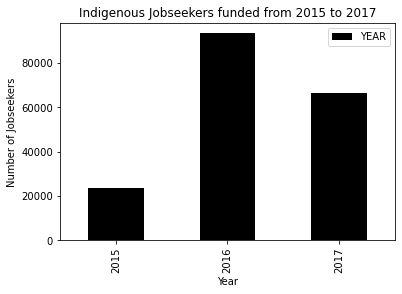

In [15]:
# Total number of Indigenous Jobseekers funded from 2015 to 2017
ind_js_df = df.loc[df["INDIGENOUS"] == 1]

ind_js_2015 = len(ind_js_df.loc[ind_js_df["YEAR"] == 2015])
ind_js_2016 = len(ind_js_df.loc[ind_js_df["YEAR"] == 2016])
ind_js_2017 = len(ind_js_df.loc[ind_js_df["YEAR"] == 2017])

total = ind_js_2015 + ind_js_2016 + ind_js_2017

pprint("Indigenous Job Seekers funded from 2015 to 2017")
pprint(f"Year 2015 : {ind_js_2015}")
pprint(f"Year 2016 : {ind_js_2016}")
pprint(f"Year 2017 : {ind_js_2017}")
pprint(f"Total : {total}")
ind_df = ind_js_df.groupby('YEAR')
ind_count_df = pd.DataFrame(ind_df['YEAR'].count())

total_by_year = ind_count_df.plot(
    kind='bar', title='Indigenous Jobseekers funded from 2015 to 2017', color="black")

total_by_year.set_xlabel('Year')
total_by_year.set_ylabel('Number of Jobseekers')


In [16]:
# Percentage of indigenous jobseekers to the rest of the jobseekers
per_ind_js = total/len(df)
per_format = "{:.2%}". format(per_ind_js)
pprint(f"Percentage of Indigenous jobseekers : {per_format}")


'Percentage of Indigenous jobseekers : 14.87%'


<AxesSubplot:title={'center':'Gender distribution of Jobseekers'}, ylabel='GENDER'>

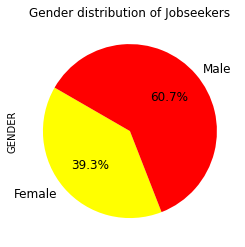

In [17]:
# Gender Distribution of Indigenous Jobseekers

gender = ind_js_df.groupby("GENDER")
gender_count = pd.DataFrame(gender["GENDER"].count())

gender_count.plot(kind='pie', y='GENDER', title='Gender distribution of Jobseekers', startangle=150,
                  autopct='%1.1f%%', fontsize=12, colors=['yellow', 'red'], legend=False)


In [18]:
# Total amount and percentage spent by Category

amt_spent_category_df = ind_js_df[['EF_CATEGORY_DESCRIPTION', 'EXPENDITURE']]
amt_spent_category_count = amt_spent_category_df['EF_CATEGORY_DESCRIPTION'].value_counts(
    0)
amt_spent_category_percent = amt_spent_category_df['EF_CATEGORY_DESCRIPTION'].value_counts(
    1)

amt_spent_by_category = pd.DataFrame(
    {'Amount Spent': amt_spent_category_count, 'Percentage of amount spent': amt_spent_category_percent})
amt_spent_by_category['Amount Spent'] = amt_spent_by_category['Amount Spent'].map(
    '${:,.2f}'.format)
amt_spent_by_category['Percentage of amount spent'] = amt_spent_by_category['Percentage of amount spent'].map(
    '{:,.2%}'.format)
amt_spent_by_category.index.name = "Categories"
amt_spent_by_category


,Amount Spent,Percentage of amount spent
Categories,,
Clothing and Presentation,"$42,351.00",23.06%
Professional Services,"$30,457.00",16.59%
"Food, Phone and Petrol Cards/Vouchers","$25,497.00",13.89%
Job Seeker Transport,"$18,277.00",9.95%
Work Related Items,"$17,448.00",9.50%
Accredited Training,"$16,133.00",8.79%
Work Related Licencing,"$11,266.00",6.14%
"Tools, Books, Equipment and Mobile Phones","$8,554.00",4.66%
Targeted Pre-Employment Preparation,"$7,914.00",4.31%


In [19]:
# Summary statistics by Category
summary_category = ind_js_df.groupby(['EF_CATEGORY_DESCRIPTION'])[
    'EXPENDITURE'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_category


,mean,median,var,std,sem
EF_CATEGORY_DESCRIPTION,,,,,
Accredited Interpreter Services,225.936316,154.00,61431.899858,247.854594,56.861744
Accredited Training,724.022101,528.00,609495.547040,780.701958,6.146497
Clothing and Presentation,106.443450,85.00,6695.781895,81.827757,0.397621
Driving Lessons,171.305401,143.00,14880.289128,121.984791,3.042971
Employer Required Training (non-accredited),1051.093750,1065.72,226243.975811,475.651107,27.646659
"Food, Phone and Petrol Cards/Vouchers",39.155961,27.50,972.484437,31.184683,0.195298
Job Seeker Transport,112.077385,33.00,51907.615484,227.832429,1.685245
Medical Expenses,182.627372,134.98,33958.362916,184.277950,7.244714
Non-WfD Activity Costs,186.339000,214.50,6432.668946,80.203921,17.934142


In [20]:
# Total amount and percentage spent by Streams
amt_spent_stream_df = ind_js_df[['STREAM_PLACEMENT_DESC', 'EXPENDITURE']]
amt_spent_stream_count = amt_spent_stream_df['STREAM_PLACEMENT_DESC'].value_counts(
    0)
amt_spent_stream_percent = amt_spent_stream_df['STREAM_PLACEMENT_DESC'].value_counts(
    1)

amt_spent_by_stream = pd.DataFrame(
    {'Amount Spent': amt_spent_stream_count, 'Percentage of amount spent': amt_spent_stream_percent})
amt_spent_by_stream['Amount Spent'] = amt_spent_by_stream['Amount Spent'].map(
    '${:,.2f}'.format)
amt_spent_by_stream['Percentage of amount spent'] = amt_spent_by_stream['Percentage of amount spent'].map(
    '{:,.2%}'.format)
amt_spent_by_stream.index.name = "Streams"
amt_spent_by_stream


,Amount Spent,Percentage of amount spent
Streams,,
Stream B,"$93,489.00",50.92%
Stream C,"$59,825.00",32.58%
Stream A,"$29,484.00",16.06%
Stream Volunteer,$816.00,0.44%


In [21]:
# Summary statistics by Streams
summary_stream = ind_js_df.groupby(['STREAM_PLACEMENT_DESC'])[
    'EXPENDITURE'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stream


,mean,median,var,std,sem
STREAM_PLACEMENT_DESC,,,,,
Stream A,165.030602,67.350,112144.145158,334.879299,1.950272
Stream B,186.195141,84.250,124420.308851,352.732631,1.153627
Stream C,164.083032,103.500,71089.689589,266.626498,1.090089
Stream Volunteer,176.399130,72.075,178974.117319,423.053327,14.809829


In [22]:
# Total and percentage of indigenous jobseekers who are homeless and/or ex-offenders
summary = ind_js_df.groupby('YEAR')
homeless_count = summary["HOMELESS"].count()
homeless_percent = homeless_count/summary["YEAR"].count()
ex_offenders_count = summary["EX_OFFENDER"].count()
ex_offenders_percent = ex_offenders_count/summary["YEAR"].count()

summary_spend_analysis = pd.DataFrame({'Homeless': homeless_count,
                                       'Ex Offenders': ex_offenders_count,
                                       'Percentage of Homeless': homeless_percent,
                                       'Percentage of Ex-Offenders': ex_offenders_percent})

summary_spend_analysis.index.name = "Year"

summary_spend_analysis['Percentage of Homeless'] = summary_spend_analysis['Percentage of Homeless'].map(
    '{:,.2%}'.format)
summary_spend_analysis['Percentage of Ex-Offenders'] = summary_spend_analysis['Percentage of Ex-Offenders'].map(
    '{:,.2%}'.format)
summary_spend_analysis


,Homeless,Ex Offenders,Percentage of Homeless,Percentage of Ex-Offenders
Year,,,,
2015,5304,6185,22.66%,26.43%
2016,18426,23688,19.71%,25.34%
2017,12924,16331,19.37%,24.48%


Text(0, 0.5, 'Number of Jobseekers')

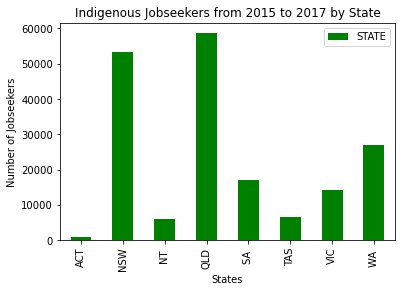

In [23]:
# Indigenous Jobseekers by State from 2015 to 2017
state_df = ind_js_df.groupby("STATE")
state_count_df = pd.DataFrame(state_df["STATE"].count())

state_count = state_count_df.plot(
    kind="bar", title='Indigenous Jobseekers from 2015 to 2017 by State', color="g")
state_count.set_xlabel('States')
state_count.set_ylabel('Number of Jobseekers')


In [24]:
# Total and average funding by state from 2015 to 2017

state = ind_js_df.groupby('STATE')

number_of_jobseekers_state = state['STATE'].count()
avg_spent_jobseekers_state = state["EXPENDITURE"].mean()
total_spent_jobseekers_state = state["EXPENDITURE"].sum()

state_spending_df = pd.DataFrame({"Number of Jobseekers": number_of_jobseekers_state,
                                  "Average Amount Spent": avg_spent_jobseekers_state,
                                  "Total Amount Spent": total_spent_jobseekers_state})

state_sort_by_spent = state_spending_df.sort_values(
    ["Total Amount Spent"], ascending=False)

state_sort_by_spent.style.format(
    {"Average Amount Spent": "${:,.2f}", "Total Amount Spent": "${:,.2f}"})


,Number of Jobseekers,Average Amount Spent,Total Amount Spent
STATE,,,
QLD,58694,$194.45,"$11,413,078.17"
NSW,53294,$167.49,"$8,926,286.12"
WA,26928,$163.34,"$4,398,480.34"
SA,16988,$161.90,"$2,750,418.32"
VIC,14331,$180.09,"$2,580,806.31"
TAS,6494,$154.06,"$1,000,494.70"
NT,5973,$165.34,"$987,587.24"
ACT,914,$192.74,"$176,167.67"
